In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('liver_cirrhosis.csv')

In [3]:
#the dataset size is not too large
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [4]:
df.head()


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [5]:
#no missing value found
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [6]:
df['Stage'].unique()  

array([1, 2, 3], dtype=int64)

In [7]:
df['Status'].unique()

array(['C', 'D', 'CL'], dtype=object)

In [8]:
df['Drug'].unique()

array(['Placebo', 'D-penicillamine'], dtype=object)

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
 
num_feature = ['N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first'), ['Status','Drug','Sex']),
        ('oe', OrdinalEncoder(), ['Ascites','Hepatomegaly','Spiders','Edema']),
        ('ss', StandardScaler(), num_feature),
        # other transformers...
    ],
    remainder='passthrough'
)



In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

In [11]:
global model_use
def pipe_model(model_use):
    try:
        model  = model_use(random_state=42)
    except:
        model = model_use()
    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])
    return pipeline

In [12]:
model_use = [LogisticRegression,RandomForestClassifier,XGBClassifier]
#pipeline = pipe_model(model_use[0])

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Stage'])
y = df['Stage']

# Split and fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Actual  Predicted
0       1          0
1       1          2
2       3          2
3       3          2
4       3          1
5       3          2
6       3          1
7       3          1
8       2          1
9       2          1


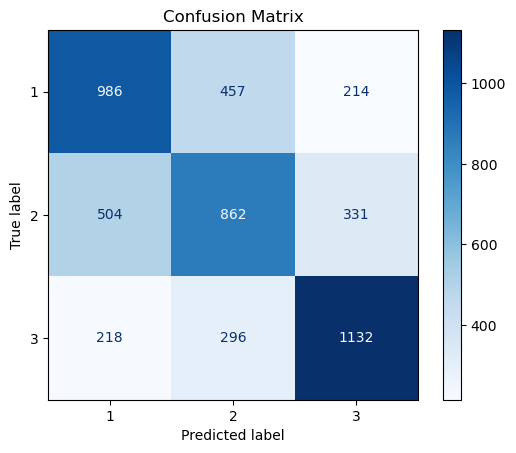

LogisticRegression ( Classification Report ):
               precision    recall  f1-score   support

           1       0.58      0.60      0.59      1657
           2       0.53      0.51      0.52      1697
           3       0.68      0.69      0.68      1646

    accuracy                           0.60      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.59      0.60      0.60      5000

   Actual  Predicted
0       1          0
1       1          0
2       3          2
3       3          2
4       3          2
5       3          2
6       3          2
7       3          2
8       2          1
9       2          1


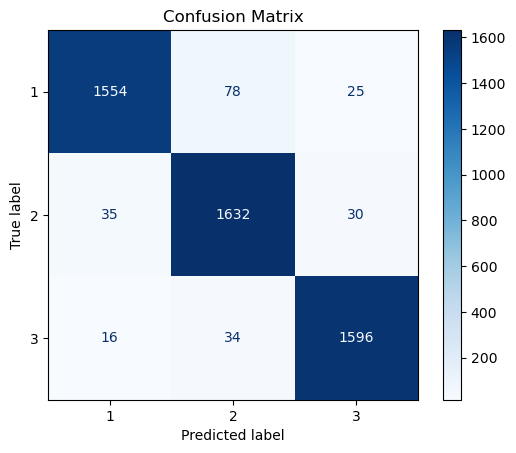

RandomForestClassifier ( Classification Report ):
               precision    recall  f1-score   support

           1       0.97      0.94      0.95      1657
           2       0.94      0.96      0.95      1697
           3       0.97      0.97      0.97      1646

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000

   Actual  Predicted
0       1          0
1       1          0
2       3          2
3       3          2
4       3          2
5       3          2
6       3          2
7       3          2
8       2          1
9       2          1


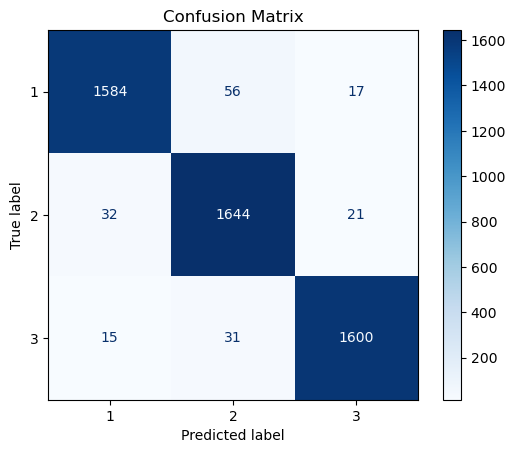

XGBClassifier ( Classification Report ):
               precision    recall  f1-score   support

           1       0.97      0.96      0.96      1657
           2       0.95      0.97      0.96      1697
           3       0.98      0.97      0.97      1646

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



In [15]:
from sklearn.preprocessing import LabelEncoder

#Since xgbclassifier labels the y from 0,1,2 instead of 1,2,3 , so we will first use labelencoder to transform
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

for i,eachmodel in enumerate(model_use):
    pipeline = pipe_model(eachmodel)
    pipeline.fit(X_train, y_train_encoded)
    y_pred = pipeline.predict(X_test)
    # Create comparison DataFrame
    comparison = pd.DataFrame({
        
        'Actual': y_test.values,
        'Predicted': y_pred
        })
    
    # Display
    print(comparison.head(10)) 
    true_labels = le.inverse_transform(pipeline.classes_)

    cm = confusion_matrix(y_test_encoded, y_pred, labels=pipeline.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=true_labels)
    disp.plot(cmap='Blues', values_format='d')
    plt.title("Confusion Matrix")
    plt.show()
    
    report = classification_report(y_test_encoded, y_pred, target_names=true_labels.astype(str))
    print(f"{model_use[i].__name__ } ( Classification Report ):\n", report)
    with open("result_log","a") as f:
        
        f.write(f"model_used : {model_use[i].__name__}\n")
        f.write(f"{report}\n\n")

In [16]:
#XGBClassifier works best for the dataset , with maximum accuracy of 97 percent